### Importing Modules

In [24]:
import seaborn as sns
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt


### Importing the dataset

In [25]:
df_test = pd.read_csv('data/laptops_test.csv', sep = ',') # test data
df = pd.read_csv('data/laptops_train.csv', sep = ',') # train data

In [26]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              325 non-null    object 
 1   Model Name                325 non-null    object 
 2   Category                  325 non-null    object 
 3   Screen Size               325 non-null    object 
 4   Screen                    325 non-null    object 
 5   CPU                       325 non-null    object 
 6   RAM                       325 non-null    object 
 7    Storage                  325 non-null    object 
 8   GPU                       325 non-null    object 
 9   Operating System          325 non-null    object 
 10  Operating System Version  291 non-null    object 
 11  Weight                    325 non-null    object 
 12  Price                     325 non-null    float64
dtypes: float64(1), object(12)
memory usage: 33.1+ KB


In [29]:
# To know the distinct occurence
dict = {}

for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict, index = ['unique_count']).transpose()

,unique_count
Manufacturer,19
Model Name,488
Category,6
Screen Size,18
Screen,38
CPU,106
RAM,8
Storage,36
GPU,98
Operating System,7


In [30]:
df.duplicated().sum()
# 0 coming so no rows identically same

0

In [31]:
# Removing GB
df["RAM"] = df["RAM"].str.replace("GB", "")
df_test["RAM"] = df["RAM"].str.replace("GB","")
df["RAM"]= df["RAM"].astype("int32")
df_test["RAM"]= df_test["RAM"].astype("int32")

In [32]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [33]:
(df.isnull().sum()/len(df))
# OS version not returning 0 so need to fill some rows

Manufacturer                0.000000
Model Name                  0.000000
Category                    0.000000
Screen Size                 0.000000
Screen                      0.000000
CPU                         0.000000
RAM                         0.000000
 Storage                    0.000000
GPU                         0.000000
Operating System            0.000000
Operating System Version    0.139202
Weight                      0.000000
Price                       0.000000
dtype: float64

In [34]:
# Filling vacant rows for our models to work properly

df['Operating System Version']=df['Operating System Version'].fillna(df['Operating System Version'].mode()[0])
df_test['Operating System Version']=df_test['Operating System Version'].fillna(df_test['Operating System Version'].mode()[0])

In [35]:
df.describe()

,RAM,Price
count,977.000000,9.770000e+02
mean,8.528147,1.001899e+07
std,4.997487,6.306430e+06
min,2.000000,1.706375e+06
25%,4.000000,5.326308e+06
50%,8.000000,8.527428e+06
75%,8.000000,1.311570e+07
max,32.000000,5.423231e+07


In [36]:
df.dtypes

Manufacturer                 object
Model Name                   object
Category                     object
Screen Size                  object
Screen                       object
CPU                          object
RAM                           int32
 Storage                     object
GPU                          object
Operating System             object
Operating System Version     object
Weight                       object
Price                       float64
dtype: object

In [37]:
# removing kgs from weight and then making weights into data type
# making the price into numeric data type

df['Weight'].replace(to_replace='kg', value='', regex=True, inplace=True)
df_test['Weight'].replace(to_replace='kg', value='', regex=True, inplace=True)
df_test['Weight'].replace(to_replace='s', value='', regex=True, inplace=True)

df['Weight'] = df['Weight'].astype("float64")
df_test['Weight'] = df_test['Weight'].astype("float64")

In [38]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20


In [39]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0


In [40]:
df["Screen Size"] = df["Screen Size"].str.replace("\"","")
# df_test["Screen Size"] = df_test["Screen Size"].str.replace('"',"")
df['Screen Size'] = df['Screen Size'].astype("float64")
# df_test['Screen Size'] = df_test['Screen Size'].astype("float64")

In [41]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0


In [42]:
df_test["Screen Size"] = df_test["Screen Size"].str.replace('"',"")
df_test['Screen Size'] = df_test['Screen Size'].astype("float64")

In [43]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0


In [44]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    float64
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    int32  
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  977 non-null    object 
 11  Weight                    977 non-null    float64
 12  Price                     977 non-null    float64
dtypes: float64(3), int32(1), object(9)
memory usage: 95.5+ KB


In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              325 non-null    object 
 1   Model Name                325 non-null    object 
 2   Category                  325 non-null    object 
 3   Screen Size               325 non-null    float64
 4   Screen                    325 non-null    object 
 5   CPU                       325 non-null    object 
 6   RAM                       325 non-null    int32  
 7    Storage                  325 non-null    object 
 8   GPU                       325 non-null    object 
 9   Operating System          325 non-null    object 
 10  Operating System Version  325 non-null    object 
 11  Weight                    325 non-null    float64
 12  Price                     325 non-null    float64
dtypes: float64(3), int32(1), object(9)
memory usage: 31.9+ KB


C:\Users\aasad\AppData\Local\Temp/ipykernel_9924/941010651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

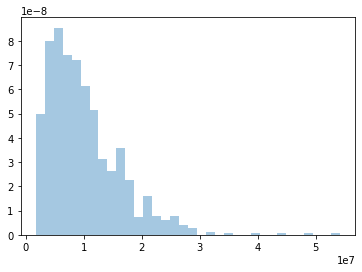

In [47]:
sns.distplot(df["Price"])

In [48]:
df['Ips'] = df['Screen'].apply(lambda x:1 if 'IPS' in x else 0)
df_test['Ips'] = df_test['Screen'].apply(lambda x:1 if 'IPS' in x else 0)

In [49]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,1


In [50]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0,0
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,0
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0,1
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0,0
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0,0


In [51]:
new = df['Screen'].str.split('x',n=1,expand=True)
new_test = df_test['Screen'].str.split('x',n=1,expand=True)

In [52]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,1


In [53]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

df_test['X_res'] = new_test[0]
df_test['Y_res'] = new_test[1]

In [54]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,1,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,1,IPS Panel Retina Display 2560,1600


In [55]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,X_res,Y_res
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0,0,1366,768
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,0,Full HD 1920,1080
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0,1,IPS Panel Full HD / Touchscreen 1920,1080
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0,0,Full HD 1920,1080
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0,0,Full HD 1920,1080


In [56]:
# Cleaning the X component of the resolution
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df_test['X_res'] = df_test['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [57]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,1,2560,1600


In [58]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,X_res,Y_res
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0,0,1366,768
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,0,1920,1080
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0,1,1920,1080
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0,0,1920,1080
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0,0,1920,1080


In [59]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

df_test['X_res'] = df_test['X_res'].astype('int')
df_test['Y_res'] = df_test['Y_res'].astype('int')

In [60]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,1,2560,1600


In [61]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,X_res,Y_res
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0,0,1366,768
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,0,1920,1080
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0,1,1920,1080
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0,0,1920,1080
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0,0,1920,1080


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    float64
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    int32  
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  977 non-null    object 
 11  Weight                    977 non-null    float64
 12  Price                     977 non-null    float64
 13  Ips                       977 non-null    int64  
 14  X_res     

In [63]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              325 non-null    object 
 1   Model Name                325 non-null    object 
 2   Category                  325 non-null    object 
 3   Screen Size               325 non-null    float64
 4   Screen                    325 non-null    object 
 5   CPU                       325 non-null    object 
 6   RAM                       325 non-null    int32  
 7    Storage                  325 non-null    object 
 8   GPU                       325 non-null    object 
 9   Operating System          325 non-null    object 
 10  Operating System Version  325 non-null    object 
 11  Weight                    325 non-null    float64
 12  Price                     325 non-null    float64
 13  Ips                       325 non-null    int64  
 14  X_res     

In [65]:
df.corr(numeric_only=True)['Price']

Screen Size    0.075152
RAM            0.764005
Weight         0.224415
Price          1.000000
Ips            0.234718
X_res          0.579901
Y_res          0.577594
Name: Price, dtype: float64

In [70]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Screen Size']).astype('float')
df_test['ppi'] = (((df_test['X_res']**2) + (df_test['Y_res']**2))**0.5/df_test['Screen Size']).astype('float')
# finding dpi or ppi

In [71]:
df.corr(numeric_only=True)['Price']

Screen Size    0.075152
RAM            0.764005
Weight         0.224415
Price          1.000000
Ips            0.234718
X_res          0.579901
Y_res          0.577594
ppi            0.499022
Name: Price, dtype: float64

In [72]:
df.drop(columns=['Screen'],inplace=True)
df_test.drop(columns=['Screen'],inplace=True)

In [73]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,X_res,Y_res,ppi
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37,11912523.48,1,2560,1600,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34,7993374.48,0,1440,900,127.677940
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86,5112900.00,0,1920,1080,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83,22563005.40,1,2880,1800,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37,16037611.20,1,2560,1600,226.983005


In [74]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Ips,X_res,Y_res,ppi
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0,0,1366,768,100.454670
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,0,1920,1080,127.335675
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0,1,1920,1080,141.211998
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Intel Core i5 6200U 2.3GHz,16,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,10625940.0,0,1920,1080,165.632118
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,AMD A12-Series 9720P 3.6GHz,8,256GB SSD,AMD Radeon 530,Windows,10,2.20,4881708.0,0,1920,1080,141.211998
